In [17]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
sim_data_1 = pd.read_csv("Attempt1/simulation.csv", names = ['rain'])
conv_log_1 = pd.read_csv("Attempt1/convergence_log.csv", names = ['Residual'])

sim_data_2 = pd.read_csv("Attempt2/simulation.csv", names = ['rain'])
conv_log_2 = pd.read_csv("Attempt2/convergence_log.csv", names = ['Residual'])

sim_data_3 = pd.read_csv("Attempt3/simulation.csv", names = ['rain'])
conv_log_3 = pd.read_csv("Attempt3/convergence_log.csv", names = ['Residual'])

In [19]:
max_obsv = 750
batchsize = len(sim_data_1)
iterations = len(conv_log_1)

In [20]:
data = pd.read_csv("../month9.csv", nrows = batchsize, names = ['rain'])
data

,rain
0,118
1,5
2,0
3,0
4,2
...,...
995,0
996,34
997,15
998,0


In [21]:
def square_difference(series1, series2, maximum_observation,batchsize):
    list_1 = series1.tolist()
    list_2 = series2.tolist()
    freq_1 = np.zeros(maximum_observation,dtype = int)
    freq_2 = np.zeros(maximum_observation,dtype = int)
    
    for i in range(0,batchsize):
        freq_1[list_1[i]] += 1
        freq_2[list_2[i]] += 1
    
    return sum(np.square(freq_1-freq_2))
    

In [22]:
square_difference(sim_data_1["rain"],data["rain"],max_obsv, batchsize)

950

In [23]:
square_difference(sim_data_2["rain"],data["rain"],max_obsv, batchsize)

1494

In [24]:
square_difference(sim_data_3["rain"],data["rain"],max_obsv, batchsize)

472

In [25]:
# Set sim_data to set with minimum square difference
sim_data = sim_data_3
conv_log = conv_log_3

In [26]:
##############################################################################################################
# Month 

[Text(0.5, 0, 'Rainfall (MM)'), Text(0, 0.5, 'Freqency (days)')]

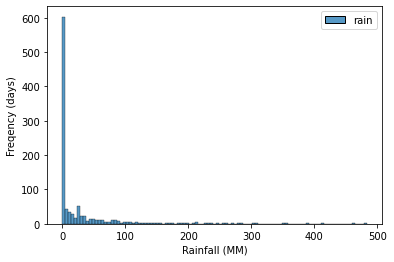

In [27]:
# Histogram of recorded rainfall data
sns.histplot(data).set(xlabel='Rainfall (MM)', ylabel='Freqency (days)')


[Text(0.5, 0, 'Rainfall (MM)'), Text(0, 0.5, 'Freqency (days)')]

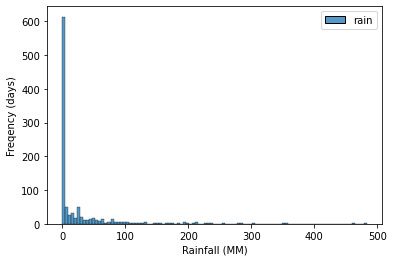

In [28]:
# Histogram of Simulated rainfall data
sns.histplot(sim_data).set(xlabel='Rainfall (MM)', ylabel='Freqency (days)')

In [29]:
# Remove 0mm data to view other values more clearly
newvalues_data = data[data['rain'] != 0]
newvalues_sim = sim_data[sim_data['rain'] != 0]

[Text(0.5, 0, 'Rainfall (MM)'), Text(0, 0.5, 'Freqency (days)')]

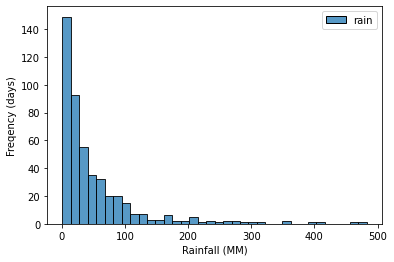

In [30]:
# Data without 0mm
sns.histplot(newvalues_data).set(xlabel='Rainfall (MM)', ylabel='Freqency (days)')

[Text(0.5, 0, 'Rainfall (MM)'), Text(0, 0.5, 'Freqency (days)')]

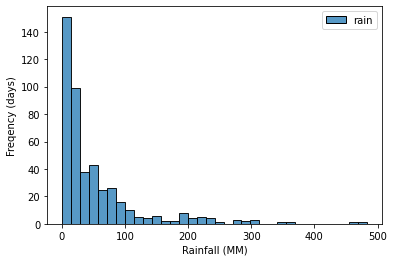

In [31]:
# Simulated Data without 0mm
sns.histplot(newvalues_sim).set(xlabel='Rainfall (MM)', ylabel='Freqency (days)')

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, '-1/log(residual)')]

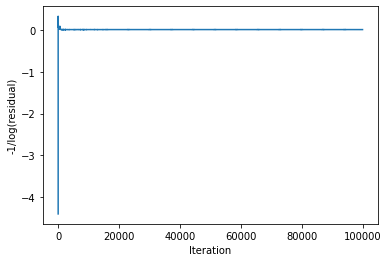

In [32]:
# Function of residuals for each iteration, function used to help visualise convergence
# function = -1/log(residual)
x = range(0,iterations)
y = [float(y) for y in conv_log['Residual']]
sns.lineplot(x = x, y = -1/np.log(y)).set(xlabel='Iteration', ylabel='-1/log(residual)')